# Intro to Machine Learning

First we will import some useful libraries

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

Usually you'll be loading your own dataset, but for now we'll use the Iris Flower dataset, an example dataset of 150 samples that comes with sklearn.

It is made of 4 numerical features: Sepal length, Sepal width, Petal length, and Petal width

It has 1 label: Species (setosa, virginica, and versicolor), which is stored as a number (0, 1, 2)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

# Let's look at 10 random samples of the data
print(", ".join(iris.feature_names))
for i in range(10):
    index = random.randint(0, 150)
    label = iris.target[index]
    print(str(iris.data[index]) + " " + str(label) + ":" + str(iris.target_names[label]))

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
[ 6.4  2.9  4.3  1.3] 1:versicolor
[ 5.4  3.   4.5  1.5] 1:versicolor
[ 5.4  3.9  1.7  0.4] 0:setosa
[ 6.1  2.6  5.6  1.4] 2:virginica
[ 5.6  3.   4.5  1.5] 1:versicolor
[ 6.9  3.1  4.9  1.5] 1:versicolor
[ 5.2  3.4  1.4  0.2] 0:setosa
[ 5.5  2.3  4.   1.3] 1:versicolor
[ 5.2  4.1  1.5  0.1] 0:setosa
[ 6.   2.2  5.   1.5] 2:virginica


For this example, we will be using a Decision Tree Classifier and a K-Nearest Neighbor Classifier for our models

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In order to get an idea of how classification models operate, we're going to train models on 2 features in the data and visualize how the models predict class from the features. There are 4 features in our dataset, so to get more examples, we will look at all 6 possible combinations of 2 features from the 4 available. We will do this for both a Decision Tree Classifier and a K-Nearest Neighbors Classifier.

We will train a total of 12 models using different pairings of iris data features After training, we will graph each model's predictions for different feature values. The colored regions represent what class the model would predict if given a new datapoint that fell in that region   

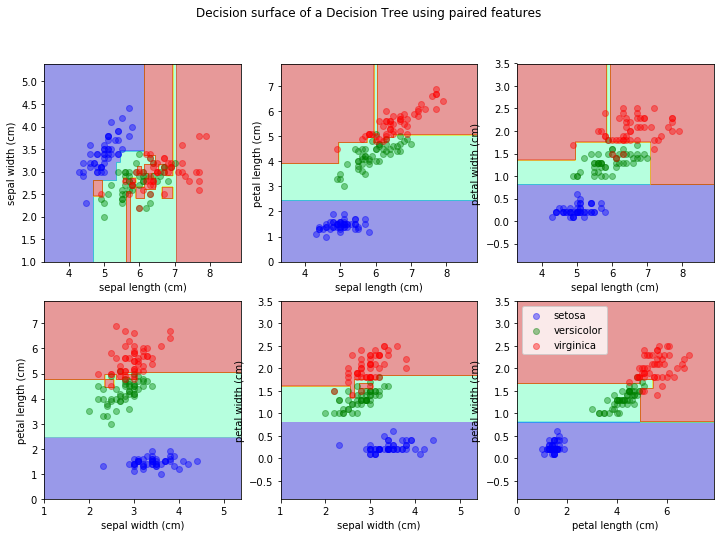

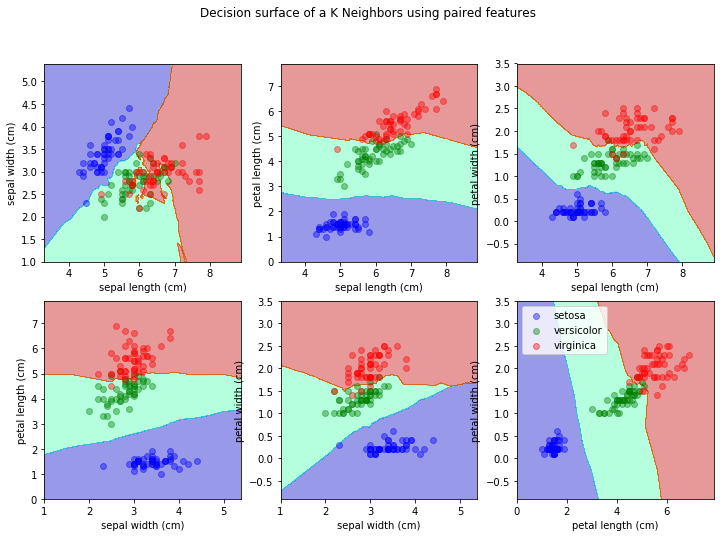

In [4]:
# Iterate through the two models
for (name, model) in zip(["Decision Tree", "K Neighbors"], [DecisionTreeClassifier(), KNeighborsClassifier()]):
    # Set the size of the graph
    plt.figure(figsize=(12,8))
    # Loop through the combinations of features
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take two feature columns from the data array 
        X = iris.data[:, pair]
        y = iris.target

        # Train this model
        clf = model.fit(X, y)

        # Choose which subsection of the graph to use
        plt.subplot(2, 3, pairidx + 1)

        # Build a grid of points to predict
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict values for each point in the grid
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the grid of predictions as contour plot
        cs = plt.contourf(xx, yy, Z, cmap='jet', alpha=0.4)

        # Label the axes
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(3), "bgr"):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                        cmap=plt.cm.Paired, marker='o', alpha=0.4)
    plt.suptitle("Decision surface of a " + name + " using paired features")
    plt.legend()
    plt.show()

In the above graphs, we can get a rough idea of how Machine Learning works! We supplied a model with labeled data, and it has trained itself using that data. The model has learned how to predict a flower's species if given these features as clues.

The above example was an oversimplification to make it easy to visualize. The above models only used two features each, but in the real world we will use many features simultaneously. Let's try this with the iris dataset.

In [5]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

We now have a trained model! Let's give it some made-up data to make predictions with. To get a prediction, we must give the model some unlabeled X data.

In [6]:
newdata = []
newdata.append([5, 4, 1.5, 0.5]) # This should be a setosa
newdata.append([6, 3, 4, 1]) # This should be a versicolor
newdata.append([7.5, 3, 6, 2]) # This should be a virginica
print(model.predict(newdata))
print([iris.target_names[x] for x in model.predict(newdata)])

[0 1 2]
['setosa', 'versicolor', 'virginica']


Now that we've got an understanding of how models work, let's talk about accuracy. We must see how accurately the model can classify datapoints that were NOT used to train the model.

The hard way to do this is to go find new flowers and score the model's attempts to classify them. The easy way to do this is to take our existing labeled data and randomly split it into two sets: Train and Test. The Train set will be used to train the model. We will then score the model's attempts to classify the datapoints in the Test set.

First we'll split the data into 60% train, 40% test. A larger Train set will make your model more accurate. However, a smaller Test set will make your measurement of model accuracy less accurate

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Split Accuracy: " + str(score*100) + "%")

Split Accuracy: 95.0%


This is the simplest way of measuring accuracy, but unfortunately it is prone to "Overfitting".
Overfitting is when we tweak our model to improve the accuracy score without actually improving the model.
This happens when we "Over-fit" the model to be good at predicting the test set, instead of all data in general.

To avoid this, we can use a technique called "Cross-validation".
In Cross-validation, we split, train, test, and measure accuracy multiple times using different splits.
Fortunately, sklearn gives us a helper method that does it all for us!
This function gives us the scores for all the different splits, so we will average to scores to see our accuracy.

In [8]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
scores = cross_val_score(model, iris.data, iris.target, cv=5)
#print("Cross-Val Scores: " + str(scores))
print("Cross-Val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Val Accuracy: 0.95 (+/- 0.07)


Using the Cross-Validation score, we can compare how different models perform on this data.

Let's try comparing some models!


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model = DecisionTreeClassifier()
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Decision Tree: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = KNeighborsClassifier(3)
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("K Neighbors: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = RandomForestClassifier()
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Random Forest: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='rbf')
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("SVC rbf: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='linear')
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("SVC linear: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Decision Tree: 	 0.967 (+/- 0.073)
K Neighbors: 	 0.967 (+/- 0.042)
Random Forest: 	 0.953 (+/- 0.068)
SVC rbf: 	 0.980 (+/- 0.033)
SVC linear: 	 0.980 (+/- 0.033)


At first glance, it looks like K-Neighbors and the SVC models are the best performing models.

However, we can't come to a conclusion just yet. Many models have different variables, known as "hyperparameters", which we can tweak to improve their performance. Models are often reliant on the size of training data, so we should determine whether these models need more samples or if they've peaked.

First let's write a function to plot learning curves, which plot performance over training sample size.

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Now let's put this to use! Let's graph the learning curves for these models. 

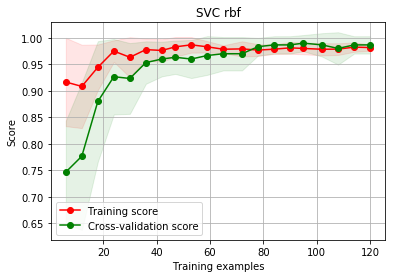

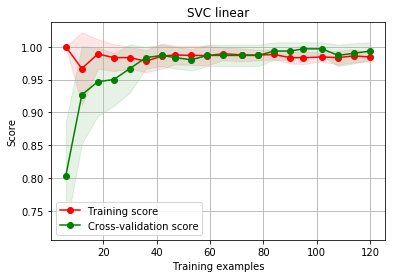

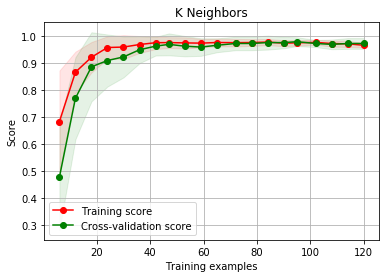

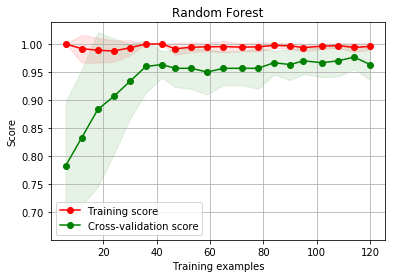

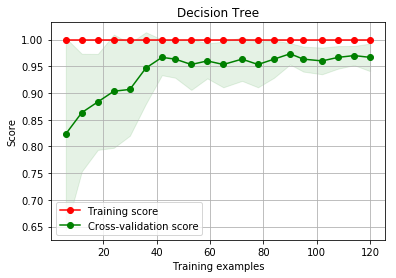

In [11]:
nrange = np.linspace(0.05, 1, 20)
#plt.clf()
plot_learning_curve(SVC(kernel='rbf'), "SVC rbf", \
                    iris.data, iris.target, train_sizes=nrange)
plot_learning_curve(SVC(kernel='linear'), "SVC linear", \
                    iris.data, iris.target, train_sizes=nrange)
plot_learning_curve(KNeighborsClassifier(), "K Neighbors", \
                    iris.data, iris.target, train_sizes=nrange)
plot_learning_curve(RandomForestClassifier(), "Random Forest", \
                    iris.data, iris.target, train_sizes=nrange)
plot_learning_curve(DecisionTreeClassifier(), "Decision Tree", \
                    iris.data, iris.target, train_sizes=nrange)
plt.show()

All four of the models look like they're plateauing in terms of performance gained from larger sampling. If one of our models looked like it could get a boost in accuracy from more training data, we might consider collecting more data, but that isn't the case here

Now let's define a function to plot validation curves, which we will use to graph performance over changes in hyperparameters in different models.

In [12]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, param, param_range, X, y, log=False):
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title(title)
    plt.xlabel("param")
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    #print(paramrange)
    #print(train_scores_mean)
    if log:
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    else:
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    if log:
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
    else:
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    print(title + " cross-val max : " + str(max(test_scores_mean)) + " at " + str([param_range[i] for i, x in enumerate(test_scores_mean) if x == max(test_scores_mean)]))

Now let's put this one to use on some different hyperparameters of different models

SVC rbf gamma cross-val max : 0.986666666667 at [0.17475284000076829, 0.22051307399030456, 0.27825594022071259, 0.35111917342151272, 0.44306214575838776]


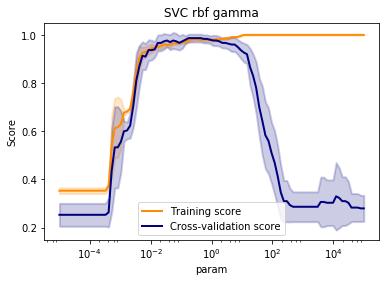

SVC rbf C cross-val max : 0.99 at [1.7886495290574351]


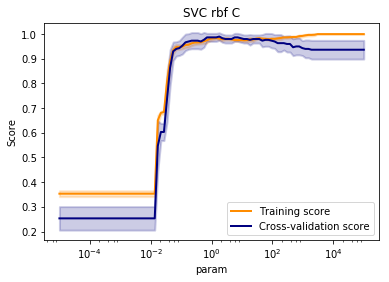

SVC linear C cross-val max : 0.996666666667 at [0.44214999073744865]


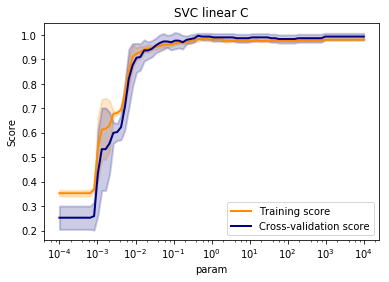

K Neighbors cross-val max : 0.983333333333 at [9, 17]


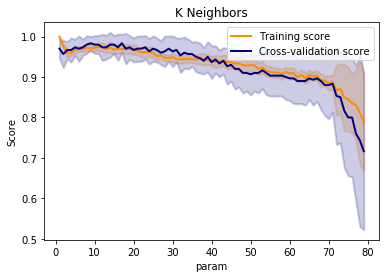

Random Forest cross-val max : 0.973333333333 at [35]


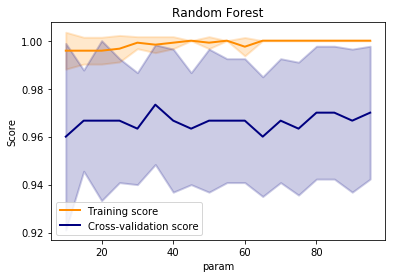

In [13]:
plt.clf()
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf gamma", "gamma", np.logspace(-5, 5, 100), iris.data, iris.target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf C", "C", np.logspace(-5, 5, 100), iris.data, iris.target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='linear'), "SVC linear C", "C", np.logspace(-4, 4, 80), iris.data, iris.target, log=True)
plt.show()
plot_validation_curve(KNeighborsClassifier(), "K Neighbors", "n_neighbors", range(1, 80), iris.data, iris.target)
plt.show()
plot_validation_curve(RandomForestClassifier(), "Random Forest", "n_estimators", range(10, 100, 5), iris.data, iris.target)
plt.show()

With the exception of the Random Forest Classifier, it's looking like these hyperparameters have a significant effect on accuracy.

Let's take the hyperparameter values that give the best performance and try them out!

In [14]:
model = KNeighborsClassifier(9)
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("K Neighbors: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='rbf', gamma=0.3, C=1.78)
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("SVC rbf: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='linear', C=0.45)
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("SVC linear: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

K Neighbors: 	 0.973 (+/- 0.050)
SVC rbf: 	 0.980 (+/- 0.033)
SVC linear: 	 0.980 (+/- 0.033)


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
target = digits.target

scores = cross_val_score(SVC(), data, target, cv=5)
print("SVC poly: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

SVC poly: 	 0.449 (+/- 0.074)


SVC rbf gamma cross-val max : 0.992222222222 at [0.0016681005372000592]


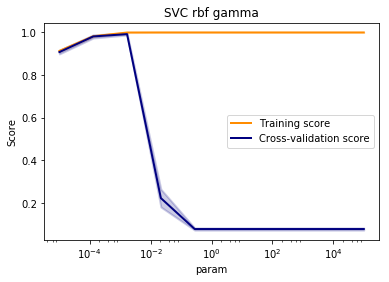

SVC rbf C cross-val max : 0.486666666667 at [3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]


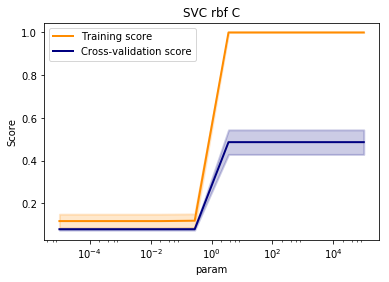

SVC linear C cross-val max : 0.985555555556 at [0.0013894954943731374]


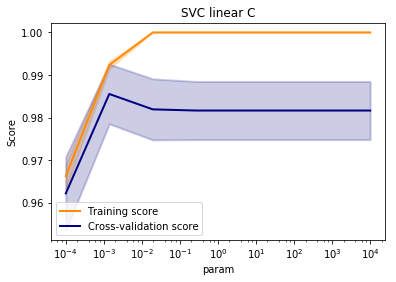

SVC poly degree cross-val max : 0.988888888889 at [3]


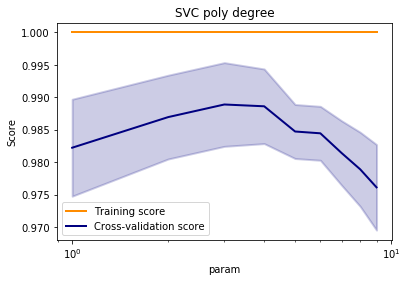

In [21]:
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf gamma", "gamma", np.logspace(-5, 5, 10), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf C", "C", np.logspace(-5, 5, 10), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='linear'), "SVC linear C", "C", np.logspace(-4, 4, 8), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='poly'), "SVC poly degree", "degree", range(1, 10), data, target)
plt.show()

SVC rbf gamma cross-val max : 0.993611111111 at [0.0012216773489967918]


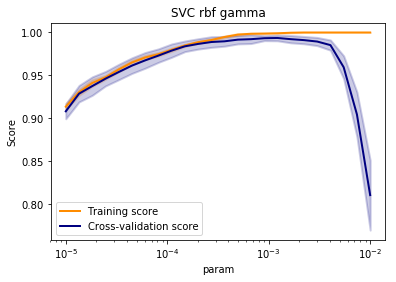

SVC rbf C cross-val max : 0.486666666667 at [3.3598182862837742, 37.926901907322382, 428.13323987193957, 4832.9302385717519, 54555.947811685146, 615848.21106602543, 6951927.9617755907, 78475997.035146222, 885866790.4100796, 10000000000.0]


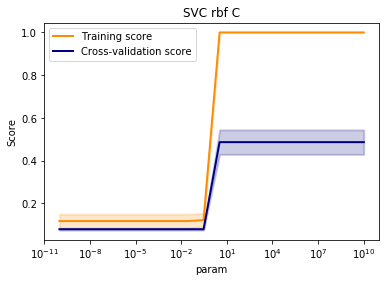

SVC linear C cross-val max : 0.985555555556 at [0.0011288378916846883]


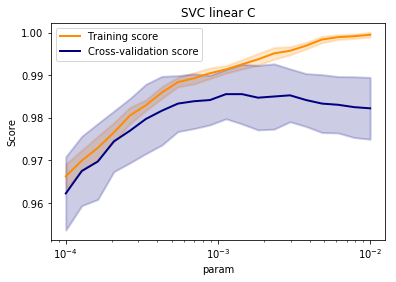

SVC poly CC cross-val max : 0.991111111111 at [1.4384498882876629e-05]


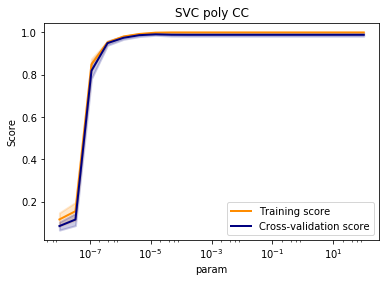

In [38]:
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf gamma", "gamma", np.logspace(-5, -2, 24), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='rbf'), "SVC rbf C", "C", np.logspace(-10, 10, 20), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='linear'), "SVC linear C", "C", np.logspace(-4, -2, 20), data, target, log=True)
plt.show()
plot_validation_curve(SVC(kernel='poly', degree=3), "SVC poly CC", "C", np.logspace(-8, 2, 20), data, target, log=True)
plt.show()

In [4]:

model = SVC(kernel='rbf', gamma=0.0012, C=10)
scores = cross_val_score(model, data, target, cv=5)
print("SVC rbf: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='linear', C=.00113)
scores = cross_val_score(model, data, target, cv=5)
print("SVC rbf: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

model = SVC(kernel='poly', degree=3, C=1.43e-5)
scores = cross_val_score(model, data, target, cv=5)
print("SVC poly: \t %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

SVC rbf: 	 0.974 (+/- 0.025)
SVC rbf: 	 0.953 (+/- 0.052)
SVC poly: 	 0.970 (+/- 0.040)


In [9]:
import sklearn.metrics as metrics

half = int(len(data)/2)
classifier = SVC(kernel='rbf', gamma=0.0012, C=10)
classifier.fit(data[:half], digits.target[:half])
expected = digits.target[half:]
predicted = classifier.predict(data[half:])
print("Confusion matrix:")
print(str(metrics.confusion_matrix(expected, predicted)))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
